# NN Prediction of Telco Client Churn

In [1]:
import sys
sys.path.append("..")
import numpy as np
import pandas as pd
from binary_nn import BinaryNN
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

np.random.seed(1)

# Data Prep

In [2]:
X_train = np.loadtxt("data-churn/x_train.csv")
y_train = np.loadtxt("data-churn/y_train.csv")
X_test = np.loadtxt("data-churn/x_test.csv")
y_test = np.loadtxt("data-churn/y_test.csv")

## Normalization

In [3]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
norm_X_train = scaler.transform(X_train)
norm_X_test = scaler.transform(X_test)

## Reshaping

In [5]:
norm_X_train = norm_X_train.T
y_train = y_train.reshape(1, y_train.shape[0])
norm_X_test = norm_X_test.T
y_test = y_test.reshape(1, y_test.shape[0])

In [6]:
print(norm_X_train.shape)
print(y_train.shape)
print(norm_X_test.shape)
print(y_test.shape)

(39, 4930)
(1, 4930)
(39, 2113)
(1, 2113)


# Binary Neural Network

In [7]:
churn_nn = BinaryNN(norm_X_train, y_train)

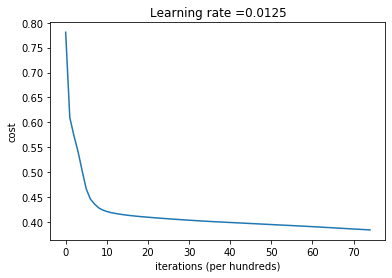

In [8]:
churn_nn.L_layer_model(layer_dimensions = [39, 30, 25, 20, 10, 5, 1],
                       print_cost = False,
                       num_iterations = 7500,
                       learning_rate = 0.0125)

## Training Performance

In [9]:
pred_train = churn_nn.predict(norm_X_train, y_train)

Accuracy: 0.8190669371196755


In [10]:
print("Precision:", precision_score(y_train[0], pred_train[0]))
print("Recall:", recall_score(y_train[0], pred_train[0]))

Precision: 0.6899151743638078
Recall: 0.5652509652509653


In [11]:
tn, fp, fn, tp = confusion_matrix(y_train[0], pred_train[0], normalize = "all").ravel()
pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])

,predicted: 0,predicted: 1
label: 0,0.670588,0.066734
label: 1,0.114199,0.148479


## Test Performance

In [12]:
pred_test = churn_nn.predict(norm_X_test, y_test)

Accuracy: 0.8050165641268339


In [13]:
print("Precision:", precision_score(y_test[0], pred_test[0]))
print("Recall:", recall_score(y_test[0], pred_test[0]))

Precision: 0.6694560669456067
Recall: 0.5574912891986062


In [14]:
tn, fp, fn, tp = confusion_matrix(y_test[0], pred_test[0], normalize = "all").ravel()
pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])

,predicted: 0,predicted: 1
label: 0,0.653573,0.074775
label: 1,0.120208,0.151443


In [15]:
# pred_train = np.where(A4 > 0.5, 1, 0)
# accuracy_score(cat_y_train[0], pred_train[0])